In [3]:
import pandas as pd

合并数据集
----------

In [10]:

df1=pd.DataFrame({'key':['b','b','a','c','a','a','b'],'data1':range(7)})
df2=pd.DataFrame({'key':['a','b','d'],'data2':range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [12]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [14]:
pd.merge(df1,df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [16]:
pd.merge(df1,df2,on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [31]:
df3=pd.DataFrame({'lkey':['b','b','a','c','a','a','b'],'data1':range(7)})
df4=pd.DataFrame({'rkey':['a','b','d'],'data2':range(3)})
pd.merge(df3,df4,left_on='lkey',right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [22]:
pd.merge(df3,df4,how='left',left_on='lkey',right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,2,a,0,a
3,3,c,NaN,NaN
4,4,a,0,a
5,5,a,0,a
6,6,b,1,b


In [27]:
df1=pd.DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
df2=pd.DataFrame({'key':['a','b','a','b','d'],'data2':range(5)})

In [28]:
pd.merge(df1,df2,on='key',how='left')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,2,a,0
5,2,a,2
6,3,c,NaN
7,4,a,0
8,4,a,2
9,5,b,1


索引上的合并
-------------

In [5]:
left1=pd.DataFrame({'key':['a','b','a','a','b','c'],'value':range(6)})
right1=pd.DataFrame({'group_val':[3.5,7]},index=['a','b'])

In [7]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [9]:
right1

,group_val
a,3.5
b,7.0


In [13]:
pd.merge(left1,right1,left_on='key',right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [14]:
pd.merge(left1,right1,left_on='key',right_index=True,how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


轴向链接
-------

In [19]:
import numpy as np
arr=np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
np.concatenate([arr,arr],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [24]:
np.concatenate([arr,arr],axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
s1=pd.Series([0,1],index=['a','b'])
s2=pd.Series([2,3,4],index=['c','d','e'])
s3=pd.Series([5,6],index=['f','g'])

In [29]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [32]:
pd.concat([s1,s2,s3],axis=1)

,0,1,2
a,0,NaN,NaN
b,1,NaN,NaN
c,NaN,2,NaN
d,NaN,3,NaN
e,NaN,4,NaN
f,NaN,NaN,5
g,NaN,NaN,6


In [34]:
s4=pd.concat([s1*5,s3])

In [36]:
s4

a    0
b    5
f    5
g    6
dtype: int64

In [38]:
pd.concat([s1,s4],axis=1)

,0,1
a,0,0
b,1,5
f,NaN,5
g,NaN,6


In [40]:
pd.concat([s1,s4],axis=1,join='inner')

,0,1
a,0,0
b,1,5


In [42]:
pd.concat([s1,s4],axis=1,join_axes=[['a','c','b','e']])

,0,1
a,0,0
c,NaN,NaN
b,1,5
e,NaN,NaN


In [48]:
result=pd.concat([s1,s1,s3],keys=['one','two','three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [51]:
result.unstack()

,a,b,f,g
one,0,1,NaN,NaN
two,0,1,NaN,NaN
three,NaN,NaN,5,6


重塑和轴向旋转
--------------

字符串对象方法
------------

In [245]:
val='a,b, guido'
val.split(" ")

['a,b,', 'guido']

In [246]:
pieces=[x.strip() for x in val.split(',')]

In [247]:
pieces

['a', 'b', 'guido']

In [248]:
first,second,third=pieces
first+'::'+second+'::'+third

'a::b::guido'

In [249]:
'##'.join(pieces)

'a##b##guido'

In [251]:
'guido' in val

True

In [253]:
val.index(',')

1

In [255]:
val.find(':')

-1

In [257]:
val.count(',')

2

In [259]:
val.replace(',','#')

'a#b# guido'

In [260]:
val.replace(',','')

'ab guido'

正则表达式
--------------

In [52]:
import re

In [54]:
text="foo bar\t baz \tqux"
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

In [56]:
regex=re.compile('\s+')

In [58]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [60]:
regex.findall(text)

[' ', '\t ', ' \t']

In [87]:
text="""Dave dave@google.com
                Steve steve@gmail.com
                Rob rob@yahoo.com"""
pattern='[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex=re.compile(pattern,flags=re.IGNORECASE)

In [88]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@yahoo.com']

In [70]:
m=regex.search(text)
text[m.start():m.end()]

'dave@google.com'

In [73]:
print regex.match(text)

None


In [74]:
regex.sub('Redacted',text)

'Dave Redacted\n                Steve Redacted\n                Rob Redacted'

In [91]:
pattern='([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex=re.compile(pattern,flags=re.IGNORECASE)

In [95]:
m=regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [101]:
regex.findall(text)

[('dave', 'google', 'com'), ('steve', 'gmail', 'com'), ('rob', 'yahoo', 'com')]

In [105]:
print regex.sub('Username: \\1 ,Domain:\\2 ,Suffix:\\3',text)

Dave Username: dave ,Domain:google ,Suffix:com
                Steve Username: steve ,Domain:gmail ,Suffix:com
                Rob Username: rob ,Domain:yahoo ,Suffix:com


In [111]:
pattern="""(?P<username>[A-Z0-9._%+-]+)@(?P<domain>[A-Z0-9.-]+)\.(?P<suffix>[A-Z]{2,4})"""
regex=re.compile(pattern,flags=re.IGNORECASE)

In [113]:
regex.findall(text)

[('dave', 'google', 'com'), ('steve', 'gmail', 'com'), ('rob', 'yahoo', 'com')]

In [117]:
m=regex.match('wesm@bright.com')
m.groupdict()

{'domain': 'bright', 'suffix': 'com', 'username': 'wesm'}

pandas中矢量化的字符串函数
--------------

In [119]:
data={'Dave':'dave@google.com','steve':'Steve@gmail.com','rob':'rob@gmail.com','Wes':np.nan}

In [123]:
data=pd.Series(data)

In [125]:
data

Dave     dave@google.com
Wes                  NaN
rob        rob@gmail.com
steve    Steve@gmail.com
dtype: object

In [128]:
data.isnull()

Dave     False
Wes       True
rob      False
steve    False
dtype: bool

In [130]:
data.str.contains('gmail')

Dave     False
Wes        NaN
rob       True
steve     True
dtype: object

In [131]:
pattern

'(?P<username>[A-Z0-9._%+-]+)@(?P<domain>[A-Z0-9.-]+)\\.(?P<suffix>[A-Z]{2,4})'

In [136]:
data.str.findall(pattern,flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Wes                        NaN
rob        [(rob, gmail, com)]
steve    [(Steve, gmail, com)]
dtype: object

In [146]:
data={'Dave':'dave@google.com','steve':'Steve@gmail.com','rob':'rob@gmail.com'}
data=pd.Series(data)
data.map(lambda x:x.upper())

Dave     DAVE@GOOGLE.COM
rob        ROB@GMAIL.COM
steve    STEVE@GMAIL.COM
dtype: object

In [148]:
matches=data.str.match(pattern,flags=re.IGNORECASE)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  if __name__ == '__main__':


In [149]:
matches

Dave     (dave, google, com)
rob        (rob, gmail, com)
steve    (Steve, gmail, com)
dtype: object

In [151]:
matches.str.get(1)

Dave     google
rob       gmail
steve     gmail
dtype: object

In [153]:
matches.str[0]

Dave      dave
rob        rob
steve    Steve
dtype: object

In [155]:
data.str[:5]

Dave     dave@
rob      rob@g
steve    Steve
dtype: object

示例：USAD食品数据库
----------

In [156]:
import json

In [158]:
db=json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [163]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [167]:
db[0]['nutrients'][2]

{u'description': u'Carbohydrate, by difference',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 3.06}

In [169]:
nutrients=pd.DataFrame(db[0]['nutrients'])

In [171]:
nutrients

,description,group,units,value
0,Protein,Composition,g,25.180
1,Total lipid (fat),Composition,g,29.200
2,"Carbohydrate, by difference",Composition,g,3.060
3,Ash,Other,g,3.280
4,Energy,Energy,kcal,376.000
5,Water,Composition,g,39.280
6,Energy,Energy,kJ,1573.000
7,"Fiber, total dietary",Composition,g,0.000
8,"Calcium, Ca",Elements,mg,673.000
9,"Iron, Fe",Elements,mg,0.640


In [176]:
info_keys=['description','group','id','manufacturer']

In [209]:
info=pd.DataFrame(db,columns=info_keys)
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [210]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [211]:
nutrients=[]
for rec in db:
    fnuts=pd.DataFrame(rec['nutrients'])
    fnuts['id']=rec['id']
    nutrients.append(fnuts)
nutrients=pd.concat(nutrients,ignore_index=True)

In [212]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [213]:
nutrients.duplicated().sum()

14223

In [214]:
nutrients=nutrients.drop_duplicates()

In [215]:
col_mapping={'description':'food','group':'fgroup'}
info=info.rename(columns=col_mapping,copy=False)

In [216]:
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [217]:
col_mapping={'description':'nutrient','group':'nutgroup'}
nutrients=nutrients.rename(columns=col_mapping,copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [218]:
ndata=pd.merge(nutrients,info,on='id',how='outer')
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [205]:
ndata.ix[3000]

food_x                   Alcohol, ethyl
fgroup_x                          Other
units                                 g
value                                 0
id                                 1159
food_y          Cheese, goat, soft type
fgroup_y         Dairy and Egg Products
manufacturer                           
Name: 3000, dtype: object

In [220]:
result=ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)

In [222]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


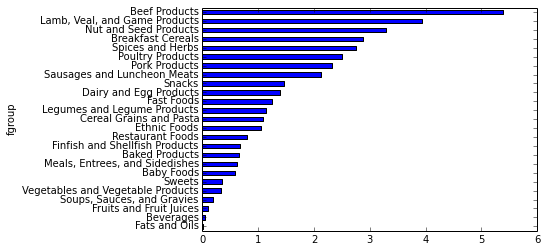

In [226]:
%pylab inline
result['Zinc, Zn'].order().plot(kind='barh')

In [228]:
by_nutrient=ndata.groupby(['nutgroup','nutrient'])
get_maximum=lambda x:x.xs(x.value.idxmax())
get_minimum=lambda x:x.xs(x.value.idmax())

max_food=by_nutrient.apply(get_maximum)[['value','food']]

In [230]:
max_food.food=max_food.food.str[:50]
max_food

value  \
nutgroup    nutrient                                     
Amino Acids Alanine                              8.009   
            Arginine                             7.436   
            Aspartic acid                       10.203   
            Cystine                              1.307   
            Glutamic acid                       17.452   
            Glycine                             19.049   
            Histidine                            2.999   
            Hydroxyproline                       0.803   
            Isoleucine                           4.300   
            Leucine                              7.200   
            Lysine                               6.690   
            Methionine                           1.859   
            Phenylalanine                        4.600   
            Proline                             12.295   
            Serine                               4.600   
            Threonine                            3.300   
            Tryptophan                           1.600   
            Tyrosine                             3.300   
            Valine                               4.500   
Composition Adjusted Protein                    12.900   
            Carbohydrate, by difference        100.000   
            Fiber, total dietary                79.000   
            Protein                             88.320   
            Sugars, total                       99.800   
            Total lipid (fat)                  100.000   
            Water                              100.000   
Elements    Calcium, Ca                       7364.000   
            Copper, Cu                          15.050   
            Fluoride, F                        584.000   
            Iron, Fe                            87.470   
...                                                ...   
Vitamins    Cryptoxanthin, beta               6186.000   
            Dihydrophylloquinone               103.800   
            Folate, DFE                       2630.000   
            Folate, food                      2340.000   
            Folate, total                     2340.000   
            Folic acid                        1538.000   
            Lutein + zeaxanthin              39550.000   
            Lycopene                         46260.000   
            Menaquinone-4                       33.200   
            Niacin                              97.000   
            Pantothenic acid                    35.000   
            Retinol                          30000.000   
            Riboflavin                          14.300   
            Thiamin                             20.000   
            Tocopherol, beta                     6.490   
            Tocopherol, delta                   30.880   
            Tocopherol, gamma                  100.880   
            Vitamin A, IU                   100000.000   
            Vitamin A, RAE                   30000.000   
            Vitamin B-12                        98.890   
            Vitamin B-12, added                 24.000   
            Vitamin B-6                         12.000   
            Vitamin C, total ascorbic acid    2400.000   
            Vitamin D                        10000.000   
            Vitamin D (D2 + D3)                250.000   
            Vitamin D2 (ergocalciferol)         28.100   
            Vitamin D3 (cholecalciferol)        27.400   
            Vitamin E (alpha-tocopherol)       149.400   
            Vitamin E, added                    46.550   
            Vitamin K (phylloquinone)         1714.500   

                                                                                         food  
nutgroup    nutrient                                                                           
Amino Acids Alanine                                         Gelatins, dry powder, unsweetened  
            Arginine                                             Seeds, sesame flour, low-fat  
          